# COGS 514 TERM PROJECT 2020-2

>Ömer Faruk Önder
>
>1879972

This .ipynb file contains the implementations used in COGS 514 term project: “Thermal Sensation Prediction with Feedforward Neural Network”. This file is sent with 2 other files. One is the project report (will be stated as paper) and dataset. The whole package should contain 3 files: 
>1 .csv file (dataset)
>
>1 .ipynb file (implementation)
>
>1 .pdf file (report)

## Miller's Implementation

The first part is the implementation done by Miller, who also conducted the Building Data Genome Project over the years. This part is directly taken from his work.

Miller directly implemented a random forest classifier model and trained the model over 70% of the data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

In [3]:
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

In [4]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [157]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.00,25.2,64.0,0.10,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.00,25.2,64.0,0.10,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.00,25.2,64.0,0.10,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.00,25.2,64.0,0.10,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.00,25.2,64.0,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104027,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.3,0.45,1.20,24.7,31.4,0.21,2.0
104030,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.0,0.42,1.40,25.2,30.2,0.12,2.0
104031,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.2,0.53,1.25,25.4,29.3,0.14,0.0
104032,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,1.0,0.57,1.27,25.3,30.1,0.23,1.0


In [6]:
ieq_data["ThermalSensation_rounded"].value_counts()

 0.0    19537
 1.0     8396
-1.0     7693
 2.0     3657
-2.0     2459
 3.0     1265
-3.0      441
Name: ThermalSensation_rounded, dtype: int64

In [83]:
feature_columns = [
 'Season',
 'Climate',
 'City',
 'Country',
 'Cooling startegy_building level',
 'Sex',
 'Clo',
 'Met',
 'Air temperature (C)',
 'Relative humidity (%)',
 'Air velocity (m/s)']

In [84]:
features = ieq_data[feature_columns]

In [87]:
features_withdummies = pd.get_dummies(features)
features_withdummies

,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Climate_Cool-summer mediterranean,...,Country_Sweden,Country_Thailand,Country_UK,Country_USA,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
2233,0.75,1.00,25.2,64.0,0.10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2234,0.64,1.00,25.2,64.0,0.10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2235,0.64,1.00,25.2,64.0,0.10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2236,0.75,1.00,25.2,64.0,0.10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2237,0.72,1.00,25.2,64.0,0.10,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104027,0.45,1.20,24.7,31.4,0.21,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
104030,0.42,1.40,25.2,30.2,0.12,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
104031,0.53,1.25,25.4,29.3,0.14,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
104032,0.57,1.27,25.3,30.1,0.23,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [88]:
target = ieq_data['ThermalSensation_rounded']+ 3

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features_withdummies, target, test_size=0.3)


In [106]:
model_rf = RandomForestClassifier(oob_score = True, max_features = 'auto', n_estimators = 100, 
                                  min_samples_leaf = 2)

In [115]:
model_rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, oob_score=True)

###### The result of the model is shown in the next 2 blocks below.

In [116]:
mean_model_accuracy = model_rf.oob_score_

print("Model accuracy: "+str(mean_model_accuracy))

Model accuracy: 0.4859763916746128


In [132]:
y_pred = model_rf.predict(X_test)
y_true = np.array(y_test)
categories = np.array(target.sort_values().unique())
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.29      0.02      0.03       126
         1.0       0.25      0.07      0.11       755
         2.0       0.38      0.28      0.32      2321
         3.0       0.55      0.80      0.65      5906
         4.0       0.41      0.28      0.33      2493
         5.0       0.38      0.22      0.28      1050
         6.0       0.40      0.18      0.24       384

    accuracy                           0.49     13035
   macro avg       0.38      0.26      0.28     13035
weighted avg       0.45      0.49      0.45     13035



After this row, Miller implemented some helpful diagrams derived from confusion matrix. The feature importance bar graph is really informative. 

In [133]:
def plot_confusion_matrix(cm, categories, title='Confusion matrix', cmap='Reds'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks,categories, rotation=90)
    plt.yticks(tick_marks,categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[   2   11   36   64   10    1    2]
 [   1   53  225  417   40   12    7]
 [   2   59  652 1424  144   29   11]
 [   1   52  534 4714  484  104   17]
 [   1   21  173 1422  693  153   30]
 [   0   11   53  465  248  236   37]
 [   0    3   29  124   69   91   68]]


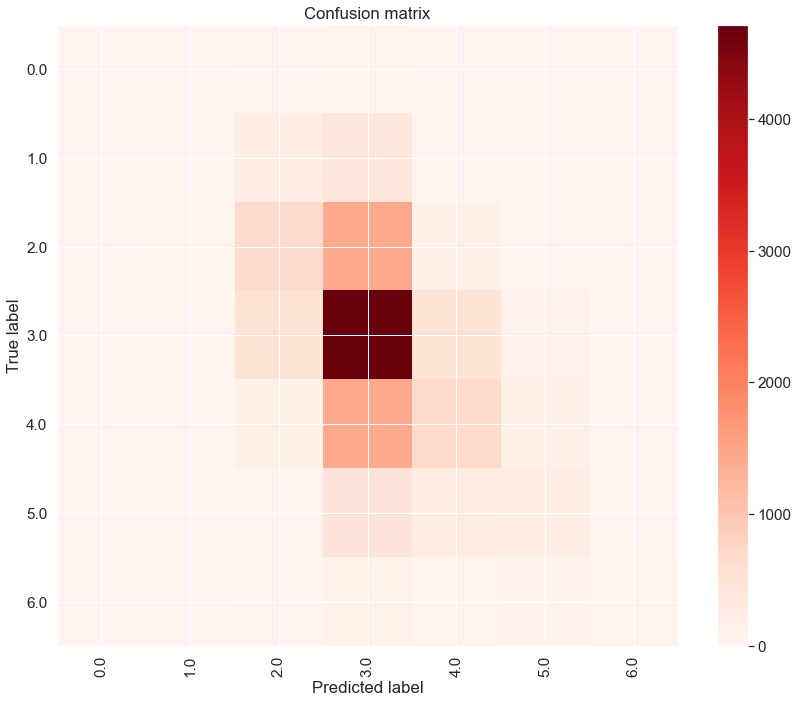

In [134]:
# Compute confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
sns.set(font_scale=1.4)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm, categories)


Normalized confusion matrix
[[1.59e-02 8.73e-02 2.86e-01 5.08e-01 7.94e-02 7.94e-03 1.59e-02]
 [1.32e-03 7.02e-02 2.98e-01 5.52e-01 5.30e-02 1.59e-02 9.27e-03]
 [8.62e-04 2.54e-02 2.81e-01 6.14e-01 6.20e-02 1.25e-02 4.74e-03]
 [1.69e-04 8.80e-03 9.04e-02 7.98e-01 8.20e-02 1.76e-02 2.88e-03]
 [4.01e-04 8.42e-03 6.94e-02 5.70e-01 2.78e-01 6.14e-02 1.20e-02]
 [0.00e+00 1.05e-02 5.05e-02 4.43e-01 2.36e-01 2.25e-01 3.52e-02]
 [0.00e+00 7.81e-03 7.55e-02 3.23e-01 1.80e-01 2.37e-01 1.77e-01]]


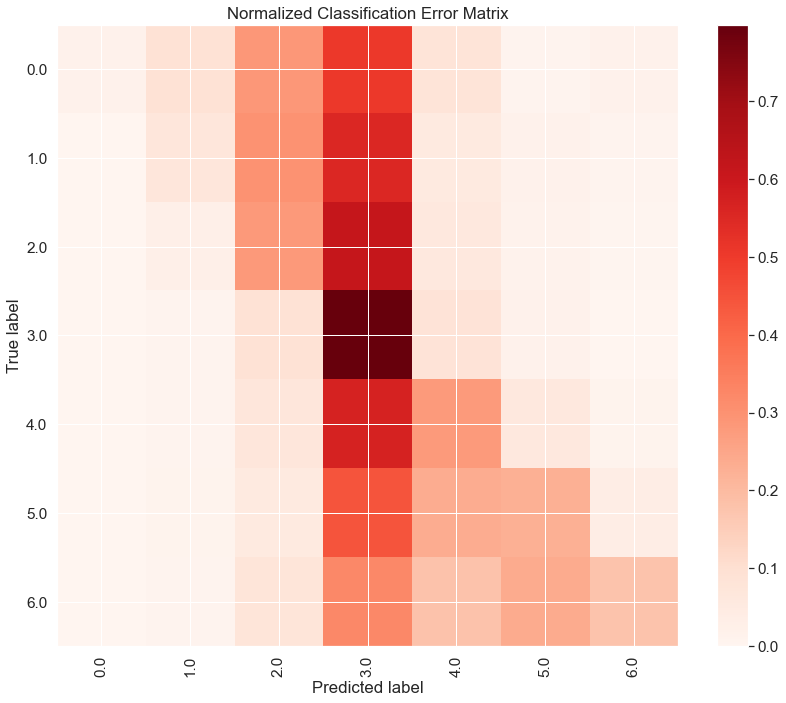

In [135]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm_normalized, categories, title='Normalized Classification Error Matrix')
plt.show()

Feature ranking:
1. feature Air temperature (C) (0.228446)
2. feature Relative humidity (%) (0.196609)
3. feature Air velocity (m/s) (0.154764)
4. feature Clo (0.151472)
5. feature Met (0.071591)
6. feature Sex_Male (0.014994)
7. feature Sex_Female (0.014477)
8. feature Season_Summer (0.012067)
9. feature Season_Winter (0.010623)
10. feature Season_Spring (0.008344)
11. feature Season_Autumn (0.007508)
12. feature Cooling startegy_building level_Mixed Mode (0.007410)
13. feature Cooling startegy_building level_Air Conditioned (0.007352)
14. feature Cooling startegy_building level_Naturally Ventilated (0.006936)
15. feature Country_India (0.005710)
16. feature Climate_Tropical wet savanna (0.005694)
17. feature Climate_Hot semi-arid (0.004745)
18. feature City_Chennai (0.004021)
19. feature Climate_Subtropical highland (0.003140)
20. feature City_Shimla (0.003095)
21. feature Country_Australia (0.002853)
22. feature Country_Brazil (0.002714)
23. feature City_Jaipur (0.002668)
24. featur

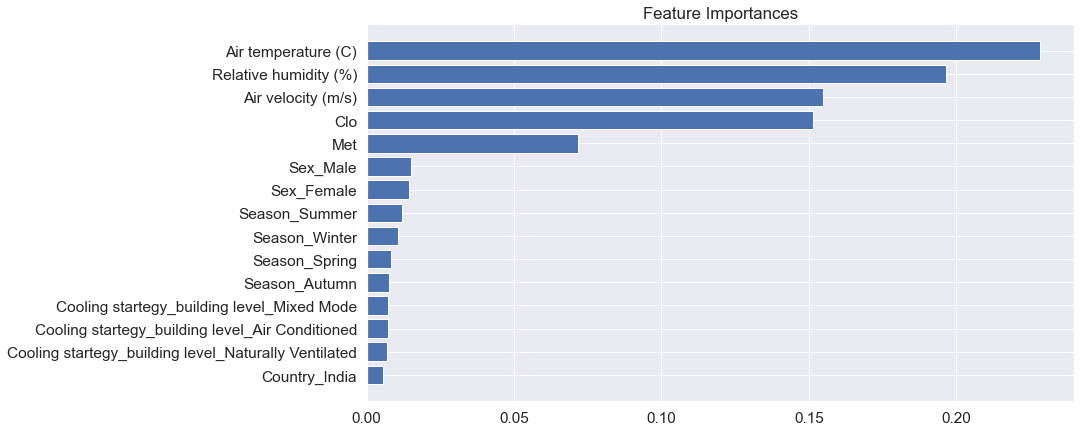

In [151]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features_withdummies.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features_withdummies.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature Importances")
plt.barh(range(15), importances[indices][:15], align="center")
plt.yticks(range(15), features_withdummies.columns[indices][:15])#
plt.gca().invert_yaxis()
plt.tight_layout(pad=0.4)
plt.show()


Miller basically used a random forest classifier for prediction. After that part, a feedforward neural network is constructed. This part is created specifically for this study. 

## Feedforward Neural Network Model

A feeforward neural network is created. The details of the neural network is stated in the paper. After several attempts, the best results has been taken with the following model and the following parameters. 

In [28]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import matplotlib.pyplot as plt

Epoch 1/50
951/951 [==============================] - 4s 4ms/step - loss: 1.5505 - accuracy: 0.4077 - val_loss: 1.3585 - val_accuracy: 0.4697
Epoch 2/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3651 - accuracy: 0.4585 - val_loss: 1.3259 - val_accuracy: 0.4743
Epoch 3/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3385 - accuracy: 0.4653 - val_loss: 1.3223 - val_accuracy: 0.4772
Epoch 4/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3320 - accuracy: 0.4678 - val_loss: 1.3161 - val_accuracy: 0.4827
Epoch 5/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3238 - accuracy: 0.4704 - val_loss: 1.3174 - val_accuracy: 0.4784
Epoch 6/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3185 - accuracy: 0.4707 - val_loss: 1.3154 - val_accuracy: 0.4808
Epoch 7/50
951/951 [==============================] - 3s 3ms/step - loss: 1.3138 - accuracy: 0.4716 - val_loss: 1.3169 - val_accuracy: 0.4809
Epoch 

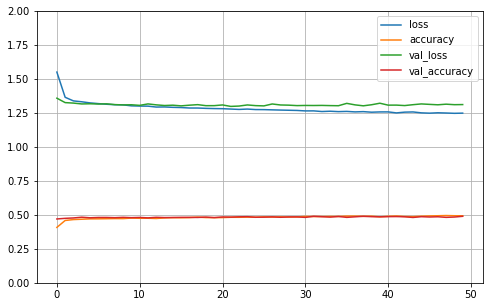

In [124]:
# the FNN model is created with an input dimension of 96 and output dimension of 7. 

model_fnn = keras.models.Sequential([
    keras.layers.Flatten(input_dim=96),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(192, activation="relu"),
    keras.layers.Dropout(rate=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(192, activation="relu"),
    keras.layers.Dropout(rate=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(96, activation="relu"),
    keras.layers.Dropout(rate=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dropout(rate=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

# The adam optimizer gave the best results with 0.001 learning rate.

adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#The loss function is selected as sparse categorical crossentropy

model_fnn.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

history = model_fnn.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()


As seen in the last epoch's results, a validation accuracy of %48.93 is obtained, which is %0.3 better than Miller's model. 

More detailed information about the model is stated in the paper. 